# DETE and TAFE Employee Exit Surveys – Data Cleaning and Analysis

## Table of Contents

- [1. Introduction](#1.-Introduction)
- [2. Identifying Missing Values and Dropping Unnecessary Columns](#2.-Identifying-Missing-Values-and-Dropping-Unnecessary-Columns)
- [3. Cleaning Column Names](#3.-Cleaning-Column-Names)
- [4. Filtering the Data](#4.-Filtering-the-Data)
- [5. Verifying the Data and Analyzing Start and Cease Dates](#5.-Verifying-the-Data-and-Analyzing-Start-and-Cease-Dates)
    - [5.1. Exploring the Start and Cease Dates](#5.1.-Exploring-the-Start-and-Cease-Dates)
    - [5.2. Handling the Missing Values](#5.2.-Handling-the-Missing-Values)
    - [5.3. Visualizing the Start and Cease Dates](#5.3.-Visualizing-the-Start-and-Cease-Dates)
- [6. Creating a New Column](#6.-Creating-a-New-Column)
- [7. Identifying Dissatisfied Employees](#7.-Identifying-Dissatisfied-Employees)
- [8. Combining the Data](#8.-Combining-the-Data)
- [9. Cleaning and Analyzing the Service Column](#9.-Cleaning-and-Analyzing-the-Service-Column)
    - [9.1. Cleaning Data and Categorizing Employees](#9.1.-Cleaning-Data-and-Categorizing-Employees)
    - [9.2. Replacing Missing Values and Plotting the Results](#9.2.-Replacing-Missing-Values-and-Plotting-the-Results)
- [10. Cleaning and Analyzing the Age Column](#10.-Cleaning-and-Analyzing-the-Age-Column)
- [11. Conclusion](#11.-Conclusion)

## 1. Introduction

In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the [Technical and Further Education](https://en.wikipedia.org/wiki/Technical_and_further_education#Queensland) (TAFE) institute in Queensland, Australia. We can find the original `DETE` exit survey data [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). However, the original `TAFE` exit survey data is no longer available. Moreover, [Dataquest](https://www.dataquest.io/) has made some slight modifications to both the original datasets to make them easier to work with, including changing the encoding to `UTF-8` from `cp1252`.

We'll play the role of data analysts and assume our stakeholders want us to combine the results of both surveys to answer the following:

- Are employees, regardless of tenure, resigning from the institutes due to some kind of dissatisfaction?
- Is there a correlation between age and resignation due to dissatisfaction among employees?

A data dictionary wasn't provided with the datasets. In a professional setting, we would typically meet with a manager to confirm the definitions of the data. For the purposes of this project, however, we'll rely on our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:
- `ID` – identifies the survey participant.
- `SeparationType` – the reason the person's employment ended.
- `Cease Date` – the year or month the person's employment ended.
- `DETE Start Date` – the year the person began employment with `DETE`.

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:
- `Record ID` – identifies the survey participant.
- `Reason for ceasing employment` – the reason the person's employment ended.
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)` – the length of the person's employment in years.

Let's start by reading the datasets into pandas and exploring them.

In [1]:
# Import the relevant libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Break the limit to the maximum number of columns to display
pd.options.display.max_columns = None

# Read the DETE and TAFE survey data from their respective CSV file
dete_survey = pd.read_csv('Datasets/dete_survey.csv')
tafe_survey = pd.read_csv('Datasets/tafe_survey.csv')

# Display the first 3 rows of the DETE and TAFE survey data
display(dete_survey.head(3))
display(tafe_survey.head(3))

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [2]:
# Display summary information for the DETE data
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
# Display summary information for the TAFE data
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

We can make the following observations based on the outputs above:

- The `dete_survey` DataFrame contains `Not Stated` entries that represent missing data.
- Both `dete_survey` and `tafe_survey` contain many irrelevant columns that we don't need to complete our analysis.
- Each DataFrame contains many of the same columns, but their names differ.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## 2. Identifying Missing Values and Dropping Unnecessary Columns

First, we'll correct the `Not Stated` values in the `DETE` survey data, then drop the columns we don't need for our analysis from both datasets.

In [4]:
# Read in the DETE survey data again to correct missing values
dete_survey = pd.read_csv('Datasets/dete_survey.csv', na_values='Not Stated')

# Display the first 3 rows
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
# Drop the unnecessary columns from the DETE and TAFE survey datasets
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Print the columns of the updated datasets
print(dete_survey_updated.columns)
print()
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fac

## 3. Cleaning Column Names

Each DataFrame contains many of the same columns, but their names differ. Since we plan to combine both datasets, it's essential to standardize their column names.

In [6]:
# Convert column names to lowercase,
# strip leading and trailing spaces, and replace the remaining spaces with underscores
dete_survey_updated.columns = (dete_survey_updated.columns.str.lower()
                                                          .str.strip()
                                                          .str.replace(" ", "_"))

# Display the updated column names of the DETE survey DataFrame
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [7]:
# Create a mapping dictionary to standardize column names
mapping = {
    'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

# Rename the columns using the mapping dictionary
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)

# Display the updated column names of the TAFE survey DataFrame
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

So far, we have properly dealt with missing values, dropped the columns we don't need for our analysis, and standardized the column names for the `DETE` and `TAFE` survey datasets. This will allow us to have more accurate data, focus the analysis on relevant variables, and make both datasets easier to merge and compare.

## 4. Filtering the Data

Let's further refine the datasets by filtering out unnecessary data. Upon examining the unique values in the `separationtype` column of each DataFrame, we observe various separation types. Since our focus is on analyzing survey respondents who resigned, we'll filter the data to include only those with a separation type containing the string `Resignation`.

In [8]:
# Display the count of unique values in the 'separationtype' column of both datasets
print(tafe_survey_updated['separationtype'].value_counts())
print()
print(dete_survey_updated['separationtype'].value_counts())

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64


Note that the `dete_survey_updated` DataFrame contains multiple separation types with the string `Resignation`. We'll need to account for each of these variations to ensure we don't unintentionally drop data: `Resignation-Other reasons`, `Resignation-Other employer`, and `Resignation-Move overseas/interstate`.

In [9]:
# Split the 'separationtype' column by '-' and select the first part
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Count the occurrences of each unique value in 'separationtype'
dete_survey_updated['separationtype'].value_counts()

separationtype
Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: count, dtype: int64

In [10]:
# Filter the DETE and TAFE survey data for rows where the separation type is 'Resignation'
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

## 5. Verifying the Data and Analyzing Start and Cease Dates

### 5.1. Exploring the Start and Cease Dates

We'll explore the `cease_date` and `dete_start_date` columns to ensure the consistency of the years recorded. So, we'll apply the following criteria:

* Since `dete_start_date` and `cease_date` represent the person's first year and last year of employment respectively, it wouldn't be logical to have years beyond the current date.
* Considering that most people in this field start working in their `20s`, it's also improbable that the `dete_start_date` would be before the year `1940`.

If we encounter many years beyond the current date or before `1940`, we would stop our analysis as it may indicate data anomalies. For instances where only a few values are unrealistically high or low, we can simply remove them.

In [11]:
# Count occurrences of each unique value in 'dete_start_date' for the DETE resignations data
dete_resignations['dete_start_date'].value_counts(dropna=False)

dete_start_date
NaN       28
2011.0    24
2008.0    22
2012.0    21
2007.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1994.0     6
2003.0     6
1992.0     6
1996.0     6
1998.0     6
2002.0     6
1990.0     5
1997.0     5
1980.0     5
1993.0     5
1989.0     4
1991.0     4
1988.0     4
1995.0     4
1986.0     3
2001.0     3
1985.0     3
1983.0     2
1976.0     2
1974.0     2
1975.0     1
1984.0     1
1971.0     1
1982.0     1
1972.0     1
1963.0     1
1977.0     1
1973.0     1
1987.0     1
Name: count, dtype: int64

In [12]:
# Count occurrences of each unique value in 'cease_date' for the DETE resignations data
dete_resignations['cease_date'].value_counts(dropna=False)

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: count, dtype: int64

In [13]:
# Split the 'cease_date' column by '/' and select the year
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]

# Convert the 'cease_date' column to float data type
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

# Count again the occurrences of each unique value in 'cease_date'
dete_resignations['cease_date'].value_counts(dropna=False)

cease_date
2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: count, dtype: int64

In [14]:
# Count occurrences of each unique value in 'cease_date' for the TAFE resignations data
tafe_resignations['cease_date'].value_counts(dropna=False)

cease_date
2011.0    116
2012.0     94
2010.0     68
2013.0     55
NaN         5
2009.0      2
Name: count, dtype: int64

### 5.2. Handling the Missing Values

Now, let's explore how we can handle some of the missing values in the `dete_start_date` and `cease_date` columns.

In [15]:
# Calculate mean, median, and mode of 'dete_start_date' for the DETE resignations data
print(f"Mean: {dete_resignations['dete_start_date'].mean().round()}")
print(f"Median: {dete_resignations['dete_start_date'].median()}")
print(f"Mode: {dete_resignations['dete_start_date'].mode()[0]}")

Mean: 2002.0
Median: 2005.0
Mode: 2011.0


The mean of the `dete_start_date` column is approximately `2002.0`, the median is `2005.0`, and the mode is `2011.0`. This suggests that there might be some skewness or outliers in the data, as the mean is lower than the median. The mode indicates that there's a significant concentration of start dates around the year `2011`.

As a result, we've decided against filling in missing values in the `dete_start_date` column for the `DETE` resignations data with the mean, median, or mode. Imputing the missing entries could potentially distort the distribution of the data, so we've opted to retain them as missing.

In [16]:
# Calculate mean, median, and mode of 'cease_date' for the DETE resignations data
print(f"Mean: {dete_resignations['cease_date'].mean().round()}")
print(f"Median: {dete_resignations['cease_date'].median()}")
print(f"Mode: {dete_resignations['cease_date'].mode()[0]}")

Mean: 2013.0
Median: 2013.0
Mode: 2013.0


In [17]:
# Calculate mean, median, and mode of 'cease_date' for the TAFE resignations data
print(f"Mean: {tafe_resignations['cease_date'].mean().round()}")
print(f"Median: {tafe_resignations['cease_date'].median()}")
print(f"Mode: {tafe_resignations['cease_date'].mode()[0]}")

Mean: 2011.0
Median: 2011.0
Mode: 2011.0


The mean, median, and mode of the `cease_date` column in both the `DETE` and `TAFE` resignations DataFrames are all equal to `2013.0` and `2011.0`, respectively. This consistency implies that `2013` and `2011` were the central tendencies for the `DETE` and `TAFE` resignations, respectively.

Therefore, since there is an insignificant number of missing values in the `cease_date` column for both datasets, we'll fill these missing entries in each DataFrame with their respective average resignation year.

In [18]:
# Fill missing values in 'cease_date' with 2013 for DETE and 2011 for TAFE resignations
dete_resignations['cease_date'].fillna(2013.0, inplace=True)
tafe_resignations['cease_date'].fillna(2011.0, inplace=True)

### 5.3. Visualizing the Start and Cease Dates

Finally, let's visualize the `dete_start_date` and `cease_date` columns of the `DETE` resignations, and the `cease_date` column of the `TAFE` resignations using histograms.

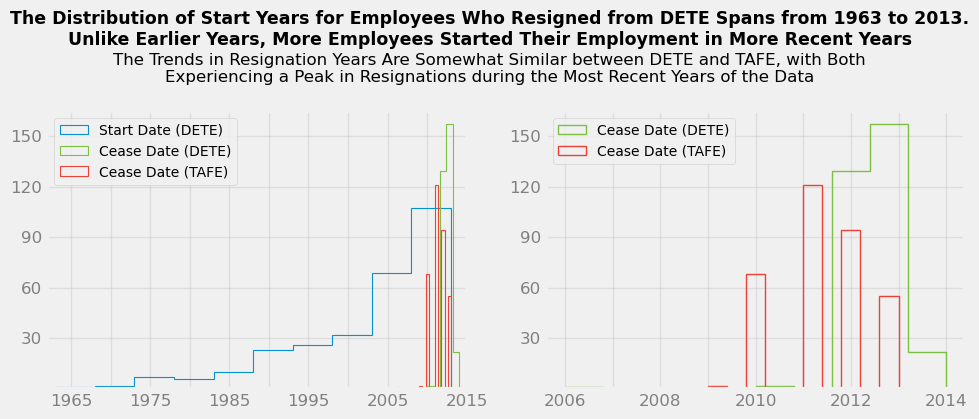

In [19]:
# Set the plot style to 'fivethirtyeight', and specify the size of the figure
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 4))

# Add a main title and a subtitle
plt.suptitle('The Distribution of Start Years for Employees Who Resigned from DETE Spans from 1963 to 2013.\n\
Unlike Earlier Years, More Employees Started Their Employment in More Recent Years',
             x=0.5, y=1.05, size=12.5, ha='center', weight='bold')
plt.figtext(s="The Trends in Resignation Years Are Somewhat Similar between DETE and TAFE, with Both\n\
Experiencing a Peak in Resignations during the Most Recent Years of the Data",
            ha="center", x=0.5, y=0.87, size=12)


# Plot histograms for 'dete_start_date' and 'cease_date' for DETE, and 'cease_date' for TAFE
plt.subplot(1, 2, 1)
plt.hist(dete_resignations['dete_start_date'], histtype='step', label='Start Date (DETE)', 
         color='#0392cf', lw=0.8)
plt.hist(dete_resignations['cease_date'], histtype='step', label='Cease Date (DETE)', 
         color='#7bc043', lw=0.8)
plt.hist(tafe_resignations['cease_date'], histtype='step', label='Cease Date (TAFE)', 
         color='#ee4035', lw=0.8)

# Customize ticks, limits, and gridlines, and add legend
plt.xticks(ticks=range(1965, 2020, 5),
           labels=[1965, '', 1975, '', 1985, '', 1995, '', 2005, '', 2015], size=12, c='grey')
plt.yticks(ticks=range(0, 180, 30), labels=['', 30, 60, 90, 120, 150], size=12, c='grey')
plt.xlim(1962, 2015)
plt.grid(alpha=0.5)
plt.legend(fontsize=10, framealpha=0.8)


# Plot histograms for 'cease_date' for both DETE and TAFE
plt.subplot(1, 2, 2)
plt.hist(dete_resignations['cease_date'], histtype='step', label='Cease Date (DETE)', 
         color='#7bc043', lw=1)
plt.hist(tafe_resignations['cease_date'], histtype='step', label='Cease Date (TAFE)', 
         color='#ee4035', lw=1)

# Customize ticks, gridlines, and add legend
plt.xticks(ticks=range(2006, 2015), 
           labels=[2006, '', 2008, '', 2010, '', 2012, '', 2014], size=12, c='grey')
plt.yticks(ticks=range(0, 180, 30), labels=['', 30, 60, 90, 120, 150], size=12, c='grey')
plt.grid(alpha=0.5)
plt.legend(fontsize=10, framealpha=0.8)


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Considering that we have kept the missing entries in `dete_start_date`, the most common start year for employees who resigned from `DETE` is `2011`, with `24` employees starting their employment that year. Other notable start years include `2007`, `2008`, and `2012`, each having more than `20` employees starting in those respective years.

The distribution of start years spans from as early as `1963` to as recent as `2013`, indicating a wide range of employment start dates. Additionally, there is a clear trend of increasing numbers of employees starting their employment in more recent years, with fewer employees starting in earlier years. This suggests potential growth or changes in hiring practices over time.

Given that we've fixed the missing values in the `cease_date` columns, for `DETE`, the majority of resignations occurred in `2012` and `2013`. There are also a smaller number of resignations in `2010` (`2` resignations) and `2006` (`1` resignation). As for `TAFE`, the highest number of resignations occurred in `2011`, followed by `94` resignations in `2012`, `68` in `2010`, and `55` in `2013`. Additionally, there are very few resignations in `2009` (`2` resignations).

To sum up, the trends in resignation years are somewhat similar between the two datasets, with both `DETE` and `TAFE` experiencing a peak in resignations during the most recent years of the data.

## 6. Creating a New Column

Since there aren't any major issues with the years in the `dete_resignations` DataFrame, we'll use them to create a new column. The `tafe_resignations` DataFrame already contains a service column, which we previously renamed to `institute_service`. To analyze both surveys together, we'll need to create a corresponding `institute_service` column in `dete_resignations`.

Note that we have data available in the `dete_resignations` dataset that we can use to calculate the length of time the employee spent in their workplace.

In [20]:
# Calculate the length of employment for each employee
dete_resignations['institute_service'] = (dete_resignations['cease_date'] - 
                                          dete_resignations['dete_start_date'])

# Display the length of employment for the first few employees
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## 7. Identifying Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize the dissatisfied employees from each DataFrame:

- **tafe_resignations** – `Contributing Factors. Dissatisfaction`, and `Contributing Factors. Job Dissatisfaction`
- **dete_resignations** – `job_dissatisfaction`, `dissatisfaction_with_the_department`, `physical_work_environment`, `lack_of_recognition`, `lack_of_job_security`, `work_location`, `employment_conditions`, `work_life_balance`, and `workload`.

If an employee resigned due to any of the factors above, we'll mark them as dissatisfied in a new column. After our changes, the new `dissatisfied` column will contain only one of the following values for each entry:

* `True` – indicates a person resigned because they were somehow dissatisfied.
* `False` – indicates a person resigned because of a reason other than dissatisfaction with the job.
* `NaN` – indicates the value is missing.

In [21]:
# Count unique values in the "Contributing Factors. Dissatisfaction" column, including NaN values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: count, dtype: int64

In [22]:
# Count unique values in the "Contributing Factors. Job Dissatisfaction" column, including NaN values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
NaN                      8
Name: count, dtype: int64

From the outputs above, we notice a value of `-` in both columns. This very likely signifies that dissatisfaction was not a contributing factor to the resignation for these entries. Next, let's define a function to update values in `tafe_resignations` to `True`, `False`, or `NaN` based on specific conditions.

In [23]:
def update_values(value):
    if value == '-':        # If value is '-', mark as False
        return False
    elif pd.isnull(value):  # If value is NaN, retain as None
        return None
    else:                   # If value isn't '-' or Nan, mark as True
        return True

# List columns related to dissatisfaction in 'tafe_resignations'
tafe_dissatisfaction_cols = ['Contributing Factors. Dissatisfaction',
                             'Contributing Factors. Job Dissatisfaction']

# Apply the `update_values` function to update values in dissatisfaction-related columns
tafe_resignations[tafe_dissatisfaction_cols] = (tafe_resignations[tafe_dissatisfaction_cols]
                                                .applymap(update_values))

# Verify the updates in the dissatisfaction-related columns
print(tafe_resignations[tafe_dissatisfaction_cols[0]].value_counts(dropna=False), end='\n\n')
print(tafe_resignations[tafe_dissatisfaction_cols[1]].value_counts(dropna=False))

Contributing Factors. Dissatisfaction
False    277
True      55
None       8
Name: count, dtype: int64

Contributing Factors. Job Dissatisfaction
False    270
True      62
None       8
Name: count, dtype: int64


After successfully updating the values of the dissatisfaction-related columns in `tafe_resignations`, we'll create the new `dissatisfied` column. To perform this, we'll use the `numpy.logical_or` function to combine the values of the same row from the dissatisfaction-related columns to determine if an employee resigned due to dissatisfaction.

In [24]:
# Create the new column based on logical OR operation on dissatisfaction-related columns
tafe_resignations['dissatisfied'] = np.logical_or(tafe_resignations[tafe_dissatisfaction_cols[0]],
                                                  tafe_resignations[tafe_dissatisfaction_cols[1]])

# Create a copy of the updated DataFrame to avoid SettingWithCopyWarning
tafe_resignations_up = tafe_resignations.copy()

# Display the value counts of the 'dissatisfied' column including NaN values
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    241
True      91
None       8
Name: count, dtype: int64

After determining whether an employee resigned due to dissatisfaction in `tafe_resignations`, we'll do the same for `dete_resignations` using a shorter method, as the dissatisfaction-related columns in the `dete_resignations` dataset only contain `True` and `False` values.

In [25]:
# Combine dissatisfaction-related columns to determine if an employee resigned due to dissatisfaction
dete_resignations['dissatisfied'] = dete_resignations[['dissatisfaction_with_the_department',
                                                       'job_dissatisfaction', 'employment_conditions',
                                                       'lack_of_recognition', 'lack_of_job_security',
                                                       'physical_work_environment', 'workload',
                                                       'work_location', 'work_life_balance'
                                                      ]].any(axis=1)

# Create a copy of the updated DataFrame to avoid SettingWithCopyWarning
dete_resignations_up = dete_resignations.copy()

# Check the value counts of the 'dissatisfied' column
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    162
True     149
Name: count, dtype: int64

## 8. Combining the Data

So far, we've accomplished the following:

* Renamed the columns.
* Dropped unnecessary data.
* Verified the quality of our data.
* Created a new `institute_service` column.
* Cleaned the `Contributing Factors` columns.
* Created a new column indicating if an employee resigned due to dissatisfaction.

Finally, we're ready to combine both datasets. Before proceeding, we'll add an `institute` column to differentiate the data from each survey after merging them.

In [26]:
# Add an institute column to indicate the origin of the data
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# Combine the two datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Count non-null values in each column and sort the results in descending order
combined.notnull().sum().sort_values(ascending=False)

id                                                     651
cease_date                                             651
institute                                              651
separationtype                                         651
dissatisfied                                           643
position                                               598
employment_status                                      597
age                                                    596
gender                                                 592
institute_service                                      573
Institute                                              340
WorkArea                                               340
Contributing Factors. Career Move - Private Sector     332
Contributing Factors. Career Move - Public Sector      332
Contributing Factors. Maternity/Family                 332
Contributing Factors. Career Move - Self-employment    332
Contributing Factors. Ill Health                       3

Now, let's drop columns with less than 500 non-null values.

In [27]:
# Drop columns with less than 500 non-null values
combined_updated = combined.dropna(thresh=500, axis=1).copy()

# Display the first few rows of the updated combined dataset
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
1,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
2,9.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
3,10.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
4,12.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE


In [28]:
# Display summary information about the combined dataset
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         651 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  573 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


As we can see, the combined dataset contains `651` entries across `12` columns, and several columns still have missing values that we may want to deal with.

## 9. Cleaning and Analyzing the Service Column

### 9.1. Cleaning Data and Categorizing Employees

First, we'll clean the `institute_service` column. This is tricky because the column contains values in a couple different forms. Then, we'll categorize employees according to the following definitions:

- `New`: less than 3 years in the workplace.
- `Experienced`: 3–6 years in the workplace.
- `Established`: 7–10 years in the workplace.
- `Veteran`: 11 or more years in the workplace.

Furthermore, we will base our analysis on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding needs of employees according to career stage instead of age is more effective.

In [29]:
# Count the number of unique values in the 'institute_service' column, including NaN values
combined_updated['institute_service'].value_counts(dropna=False)

institute_service
NaN                   78
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   23
7-10                  21
3.0                   20
0.0                   20
6.0                   18
4.0                   16
2.0                   15
7.0                   14
9.0                   14
More than 20 years    10
13.0                   9
8.0                    9
15.0                   7
20.0                   7
10.0                   6
14.0                   6
18.0                   6
12.0                   6
17.0                   6
22.0                   6
23.0                   5
16.0                   5
11.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
26.0                   3
36.0                   2
25.0                   2
29.0                   2
30.0   

In [30]:
# Extract years of service from 'institute_service' and convert them to float
combined_updated['institute_service'] = (combined_updated['institute_service'].astype('str')
                                            .str.extract(r'(\d+)'))
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')

# Display the count of years of service, including NaN values
combined_updated['institute_service'].value_counts(dropna=False)

institute_service
1.0     160
3.0      83
NaN      78
5.0      56
7.0      35
11.0     30
0.0      20
6.0      18
20.0     17
4.0      16
2.0      15
9.0      14
13.0      9
8.0       9
15.0      7
14.0      6
17.0      6
12.0      6
10.0      6
18.0      6
22.0      6
23.0      5
16.0      5
24.0      4
21.0      3
32.0      3
26.0      3
19.0      3
39.0      3
25.0      2
28.0      2
30.0      2
29.0      2
36.0      2
34.0      1
27.0      1
42.0      1
35.0      1
41.0      1
49.0      1
33.0      1
38.0      1
31.0      1
Name: count, dtype: int64

To categorize the employees according to the definitions we defined above, we'll create a function and apply it to the `institute_service` column of the merged dataset.

In [31]:
def employee_category(year):
    if year >= 11:
        return "Veteran"
    elif 7 <= year < 11:
        return "Established"
    elif 3 <= year < 7:
        return "Experienced"
    elif pd.isnull(year):
        return np.nan
    else:
        return "New"
    
# Apply the function to create a new column 'service_cat'
combined_updated['service_cat'] = combined_updated['institute_service'].apply(employee_category)

# Display the value counts of 'service_cat'
combined_updated['service_cat'].value_counts(dropna=False)

service_cat
New            195
Experienced    173
Veteran        141
NaN             78
Established     64
Name: count, dtype: int64

### 9.2. Replacing Missing Values and Plotting the Results

Since there are only few missing values in the `dissatisfied` column, we'll replace them with the most frequent value: `False`. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction for each `service_cat` group and plot the results.

In [32]:
# Fill missing values in the 'dissatisfied' column with False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

# Display the count of unique values in 'dissatisfied'
combined_updated['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    411
True     240
Name: count, dtype: int64

Since the `dissatisfied` column consists of `True` and `False` values, methods like `df.pivot_table()` treat Boolean values as integers. Thus, a `True` value is considered as `1`, while a `False` value is considered as `0`. Consequently, we can aggregate the `dissatisfied` column to calculate the number of people in each group, the percentage of people in each group, and so on.

<Figure size 650x400 with 0 Axes>

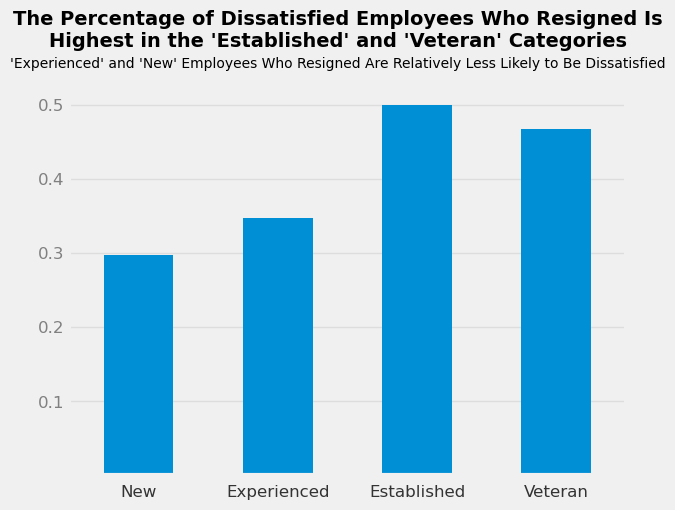

In [33]:
# Create a pivot table to calculate the percentage of dissatisfied employees in each service category
dissatisfied_pct = combined_updated.pivot_table(index='service_cat', 
                                                values='dissatisfied', 
                                                aggfunc=np.mean)
dissatisfied_pct = dissatisfied_pct.loc[['New', 'Experienced', 'Established', 'Veteran']]

# Specify the figure size
plt.figure(figsize=(6.5, 4))

# Plot a bar chart to visualize the percentage of dissatisfied employees by service category
dissatisfied_pct.plot(kind='bar', legend=False, rot=0)

# Add a main title and a subtitle
plt.suptitle("The Percentage of Dissatisfied Employees Who Resigned Is\n\
Highest in the 'Established' and 'Veteran' Categories",
             ha="center", weight='bold', size=14, x=0.5, y=1.04)
plt.figtext(s="'Experienced' and 'New' Employees Who Resigned Are Relatively Less Likely to Be Dissatisfied",
            ha="center", x=0.5, y=0.92, size=10)

# Customize ticks and gridlines for both axes, and remove x-axis label
plt.tick_params(axis='x', pad=7)
plt.xticks(size=12, c='#333333')
plt.yticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
           labels=['', 0.1, 0.2, 0.3, 0.4, 0.5], size=12, c='grey')
plt.xlabel('')
plt.grid(axis='x', visible=False)
plt.grid(axis='y', alpha=0.5)

# Display the plot
plt.show()

The graph above illustrates the percentage of dissatisfied employees who resigned from `DETE` and `TAFE` in each service category. For instance, in the `Established` and `Veteran` categories, approximately `50%` and `46.8%` of the survey respondents are dissatisfied, respectively. In the `Experienced` category, around `34.68%` are dissatisfied, while in the `New` category, it's approximately `29.74%`.

Although missing data still exists in the `service_cat` column, it appears that employees with `7` or more years of service are more inclined to resign due to job dissatisfaction compared to those with less than `7` years of service.

## 10. Cleaning and Analyzing the Age Column

We are going to clean the age column, which is tricky due to its inconsistent formats. Then, we'll categorize employees into the following age ranges: `Under 21`, `21-35`, `36-50`, `Over 50`. As for the missing entries, we'll replace them with the string `Unknown`.

In [34]:
# Display the counts of unique values in the 'age' column, including NaNs
combined_updated['age'].value_counts(dropna=False)

age
51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: count, dtype: int64

To clean the age values, we'll follow these steps:

- Combine age ranges and convert them into a uniform format.
- Replace missing values by the string `Unknown`.
- Rename some age categories for readability.

In [35]:
# Replace double spaces with hyphens
combined_updated['age'] = combined_updated['age'].str.replace('  ', '-')

# Replace '20 or younger' with 'Under 21'
combined_updated['age'] = combined_updated['age'].str.replace('20 or younger', 'Under 21')

# Combine age ranges into broader categories
combined_updated['age'] = combined_updated['age'].replace(['21-25', '26-30', '31-35'], '21-35')
combined_updated['age'] = combined_updated['age'].replace(['36-40', '41-45', '46-50'], '36-50')
combined_updated['age'] = combined_updated['age'].replace(['51-55', '56-60', 
                                                           '56 or older', '61 or older'], 'Over 50')

# Fill missing values with 'Unknown'
combined_updated['age'] = combined_updated['age'].fillna('Unknown')

# Display value counts of age ranges after cleaning
age_range_counts = (combined_updated['age'].value_counts()
                    .loc[['Under 21', '21-35', '36-50', 'Over 50', 'Unknown']])
age_range_counts

age
Under 21     10
21-35       190
36-50       247
Over 50     149
Unknown      55
Name: count, dtype: int64

Now, we're ready to visualize the age ranges using a bar plot.

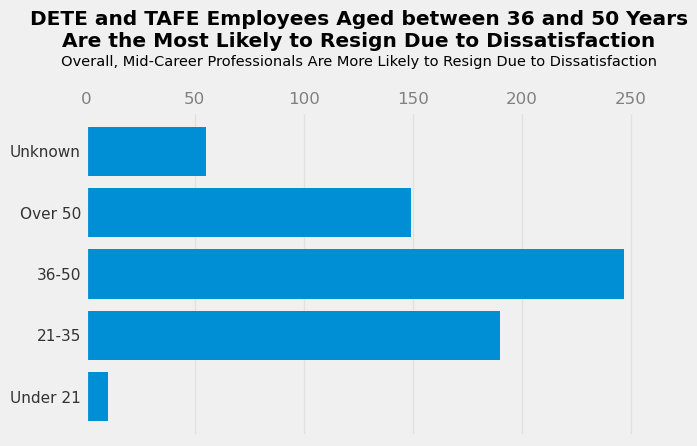

In [36]:
# Specify the figure size
plt.figure(figsize=(6.5, 4))

# Create a horizontal bar plot to visualize the age range counts
plt.barh(y=age_range_counts.index, width=age_range_counts)

# Add a main title and a subtitle
plt.suptitle("DETE and TAFE Employees Aged between 36 and 50 Years\n\
Are the Most Likely to Resign Due to Dissatisfaction",
             ha="center", weight='bold', size=14.5, x=0.5, y=1.135)
plt.figtext(s="Overall, Mid-Career Professionals Are More Likely to Resign Due to Dissatisfaction",
            ha="center", x=0.5, y=0.995, size=10.5)

# Customize ticks and gridlines for both axes, and move x-axis ticks to the top
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xticks(size=12, c='grey')
plt.yticks(size=11, c='#333333')
plt.grid(axis='y', visible=False)
plt.grid(axis='x', alpha=0.4)

# Display the plot
plt.show()

The majority of resigning employees from `DETE` and `TAFE` fall into the age categories of `21-35` and `36-50`, indicating that mid-career professionals are more likely to resign due to dissatisfaction. Interestingly, there is also a significant number of resignations from employees over `50` years old, suggesting that older workers are not immune to job dissatisfaction as well. Additionally, there are a notable number of resignations where the age is unknown, indicating potential issues with data collection or recording.

## 11. Conclusion

In summary, we analyzed modified datasets of exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the [Technical and Further Education](https://en.wikipedia.org/wiki/Technical_and_further_education#Queensland) (TAFE) institute. We assumed the role of data analysts and imagined our stakeholders wanted us to combine the results of both the `DETE` and `TAFE` surveys to address two key questions. Since a data dictionary wasn't provided with the datasets, we relied on our general knowledge to define their columns.

Throughout our work, we completed the following tasks:

- Filled in missing values in several columns and dropped irrelevant columns.
- Standardized the column names for the `DETE` and `TAFE` survey datasets.
- Created and cleaned columns when necessary.
- Ensured consistency in the recorded years.
- Filtered the data to include only survey respondents who resigned.
- Categorized dissatisfied employees according to various definitions.
- Dropped columns with less than `500` non-null values after merging the datasets.

Below are some of the insights we've uncovered:

- Considering the presence of missing values in the `dete_start_date` column, we've discovered that the most common start year for employees resigning from `DETE` is `2011`. Notable start years also include `2007`, `2008`, and `2012`. Moreover, the distribution of start years ranges from `1963` to `2013`, and there is a trend of increasing employment in recent years compared to earlier ones.

- Given that we've addressed the missing values in `cease_date`, we observe similar trends in resignation years between the two datasets – both `DETE` and `TAFE` experienced a peak in resignations during the most recent years of the data.

- After merging the `DETE` and `TAFE` resignation datasets, we observed that the percentage of dissatisfied employees who resigned was highest in the `Established` and `Veteran` categories. Conversely, `Experienced` and `New` employees who resigned were relatively less likely to be dissatisfied. Although missing data still exists in the `service_cat` column, we tentatively concluded that employees with `7` or more years of service are more inclined to resign due to job dissatisfaction compared to those with less than `7` years of service.

- The majority of resigning employees from `DETE` and `TAFE` fall into the age categories of `21-35` and `36-50`, indicating that mid-career professionals are more likely to resign due to dissatisfaction compared to older workers. Additionally, there are a notable number of resignations with unknown ages due to missing entries.